In [1]:
import cv2

In [3]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')

In [4]:
cv2.imshow('output image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# how to extract information of image

In [5]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
cv2.imshow('output image',img)
print(img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

(220, 220, 3)


# so above image height is 220,width is 220, and 3 layers RGB

# how to convert RGB to greyscale image

In [7]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
cv2.imshow('output image',img)
print(img.shape)
cv2.waitKey(0)

grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('greyimage',grey_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(220, 220, 3)


# ANother simple method

In [8]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png',0)
cv2.imshow('grey scale image',img)
print(img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

(220, 220)


# How to convert RGB to BInary image

## for converting to binary image,you first need to convert it to grey scale and then you convert it

In [13]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png',0)
cv2.imshow('grey scale image',img)
print(img.shape)
cv2.waitKey(0)

ret,bw=cv2.threshold(img,110,220,cv2.THRESH_BINARY)
cv2.imshow('binary image',bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

(220, 220)


# For pixels less than 110 it will convert it to black,rest to white

# How to convert RGB to HSV Color Space ? 

In [15]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image',img_HSV)
cv2.waitKey(0)
cv2.imshow('Hue channel',img_HSV[:,:,0])
cv2.waitKey(0)
cv2.imshow('saturation channel',img_HSV[:,:,1])
cv2.waitKey(0)
cv2.imshow('value channel',img_HSV[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

# How to Extract RGB Color Space ?

In [16]:
import numpy as np

In [20]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
B,G,R=cv2.split(img)
zeros=np.zeros(img.shape[:2],dtype="uint8")
cv2.imshow("Red",cv2.merge([zeros,zeros,R]))
cv2.waitKey(0)
cv2.imshow("Blue",cv2.merge([B,zeros,zeros]))
cv2.waitKey(0)
cv2.imshow("Green",cv2.merge([zeros,G,zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Translation or Image displacement

In [26]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
height,width=img.shape[:2]
print(height)
print(width)

quarter_height,quarter_width=height/4,width/4
print(quarter_height)
print(quarter_width)

T=np.float32([[1,0,quarter_width],
             [0,1,quarter_height]])
print(T)

#we use warpAffine Transformation to shift the image#warpAffine is used for linear image(height and width are parallel to each other)
img_translation=cv2.warpAffine(img,T,(width,height))
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.imshow('translated',img_translation)
cv2.waitKey(0)
cv2.destroyAllWindows()

220
220
55.0
55.0
[[ 1.  0. 55.]
 [ 0.  1. 55.]]


# Image Rotation

In [35]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
height,width=img.shape[:2]
rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),70,0.5)
rotated_image=cv2.warpAffine(img,rotation_matrix,(width,height))
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.imshow('rotated',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# getRotationMatrix2D takes three arguements reduce the size,angle,scaling factor (more scaling factor more loss of information)

# Image transpose

# it will rotate the image in 90 degree angle without any information loss and it does not require any other parameter.

In [2]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
transpose=cv2.transpose(img)
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.imshow('rotated',transpose)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image resizing

In [2]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
cv2.imshow('orignal',img)
cv2.waitKey(0)
#lets make the size of the image 3/4 of the original size
img_scaled=cv2.resize(img,None,fx=0.75,fy=0.75)
cv2.imshow('scaling-linear interpolation',img_scaled)#linear interpolation is used to reduce the size of image
cv2.waitKey(0)
#lets double the size of the image
img_scaled1=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
cv2.imshow('scaling-cubic interpolation',img_scaled1)#cubic interpolation is used to increase the size of image
cv2.waitKey(0)

#lets skew the resizing by setting exact dimensions
img_scaled2=cv2.resize(img,(900,400),interpolation=cv2.INTER_AREA)
cv2.imshow('scaling-skewed size',img_scaled2)#INTER_AREA resize the image according to us.
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image pyramid

# Image pyramid reduces tyhe size of the image to half without knowing the dimension of the image and inctease the size to double without knowing the dimension.

In [2]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
smaller_half=cv2.pyrDown(img)
doule=cv2.pyrUp(img)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.imshow('smaller_half',smaller_half)
cv2.waitKey(0)
cv2.imshow('double',doule)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image cropping

In [3]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
height,width=img.shape[:2]
#Lets get the starting pixel coordinates(top left of cropping rectangle)
start_row,start_col=int(height*0.10),int(width*0.10)
#Lets get the ending coordinates(bottom right)
end_row,end_col=int(height*0.75),int(width*0.75)
#simply use the indexing to crop the image
cropped=img[start_row:end_row,start_col:end_col]
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.imshow('crop_image',cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

# image arithmatics

In [5]:
import numpy as np

In [6]:
img=img=cv2.imread('E:\\aegis\\opencv\\lena.png')
M=np.ones(img.shape,dtype="uint8") * 150
added=cv2.add(img,M)
subtracted=cv2.subtract(img,M)
multiplication=cv2.multiply(img,M)
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.imshow('ADDED',added)
cv2.waitKey(0)
cv2.imshow('SUBTRACTED',subtracted)
cv2.waitKey(0)
cv2.imshow('MULTIPLY',multiplication)
cv2.waitKey(0)
cv2.destroyAllWindows()

# As the image pixels increases the image becomes bright, and image pixels becomes decreases image becomes bright.

# Image blurring

In [9]:
img=cv2.imread('E:\\aegis\\opencv\\lena.png')
#creating the 3*3 kernel filter
kernel=np.ones((3,3),np.float32)/9
#we use cv2.filter2D to convolve the kernel with an image
blurred=cv2.filter2D(img,-1,kernel)
#creating 7*7 kernel filter
kernel_77=np.ones((7,7),np.float32)/49
more_blurred=cv2.filter2D(img,-1,kernel_77)
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.imshow('blurring',blurred)
cv2.waitKey(0)
cv2.imshow('moreblurring',more_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge detection

In [2]:
import numpy as np

In [9]:
image=cv2.imread('E:\\aegis\\opencv\\lena.png',0)
height,width=image.shape
#Extract slope edges
sobel_x=cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobel_y=cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
sobel_or=cv2.bitwise_or(sobel_x,sobel_y)

#show immages
cv2.imshow('original',image)
cv2.waitKey(0)
cv2.imshow('sobel X image',sobel_x)
cv2.waitKey(0)
cv2.imshow('sobel y image',sobel_y)
cv2.waitKey(0)
cv2.imshow('sobel or image',sobel_or)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Laplacial edge detection

In [10]:
laplaced=cv2.Laplacian(img,cv2.CV_64F)
cv2.imshow('laplaced image',laplaced)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Canny edge deection(efficient one)

In [18]:
#cannny edge detection uses gradient values as thresholds
canny=cv2.Canny(img,20,180)
cv2.imshow('canny image',canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Video capture through opencv

In [20]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    cv2.imshow('our live sketch',frame)
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()

# image capture

In [5]:
import matplotlib.pyplot as plt

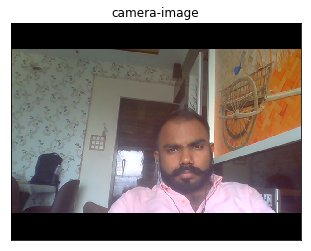

In [8]:
cap=cv2.VideoCapture(0)
if cap.isOpened():
    ret,frame=cap.read()
else:
    ret = False
img1=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.title("camera-image")
plt.xticks([])
plt.yticks([])
plt.show()
cap.release()
cv2.destroyAllWindows()


# edge dtection in while live video streaming

In [40]:
def sketch(image):
    img_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    img_grey_blur=cv2.GaussianBlur(img_grey,(5,5),0)
    cannyedge=cv2.Canny(img_grey_blur,20,170)
    ret,mask=cv2.threshold(cannyedge,90,255,cv2.THRESH_BINARY)
    return mask
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    cv2.imshow('our live sketch',sketch(frame))
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()

# color filtering using webcam

In [43]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_range=np.array([0,50,50])
    upper_range=np.array([10,255,255])
    mask=cv2.inRange(hsv,lower_range,upper_range)
    cv2.imshow('show',mask)
    cv2.imshow('show1',frame)
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows() 

# a side note, in OpenCV H has values from 0 to 180, S and V from 0 to 255. The red color, in OpenCV, has the hue values approximately in the range of 0 to 10 and 160 to 180.

# Image sharpening

In [3]:
image=cv2.imread('E:\\aegis\\opencv\\lena.png')
cv2.imshow('original',image)
cv2.waitKey(0)
#creating our sharpening email,we dont normalize since the values in the matrix sum to 1
kernel_sharpening=np.array([[-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1],
                           [-1,-1,25,-1,-1],
                           [-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1]])

#applying different kernel to the different image
sharpened=cv2.filter2D(image,-1,kernel_sharpening)
cv2.imshow('sharpening',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [9]:
#using 3*3 filter gives better image
image=cv2.imread('E:\\aegis\\opencv\\lena.png')
cv2.imshow('original',image)
cv2.waitKey(0)
#creating our sharpening email,we dont normalize since the values in the matrix sum to 1
kernel_sharpening=np.array([[-1,-1,-1],
                           [-1,9,-1],
                           [-1,-1,-1]])

#applying different kernel to the different image
sharpened=cv2.filter2D(image,-1,kernel_sharpening)
cv2.imshow('sharpening',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows() 